In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-dataset/Titanic-Dataset.csv


In [3]:
df =pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv')
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


****Summery Stastics****

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [7]:
median_fare =  df["Fare"].median()

In [8]:
median_fare

14.4542

In [11]:
median_age = df['Age'].median()
median_age

28.0

2. **Create histograms and boxplots for numeric features**

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Numeric features to visualize
numeric_features = ['Age', 'Fare', 'SibSp', 'Parch']

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

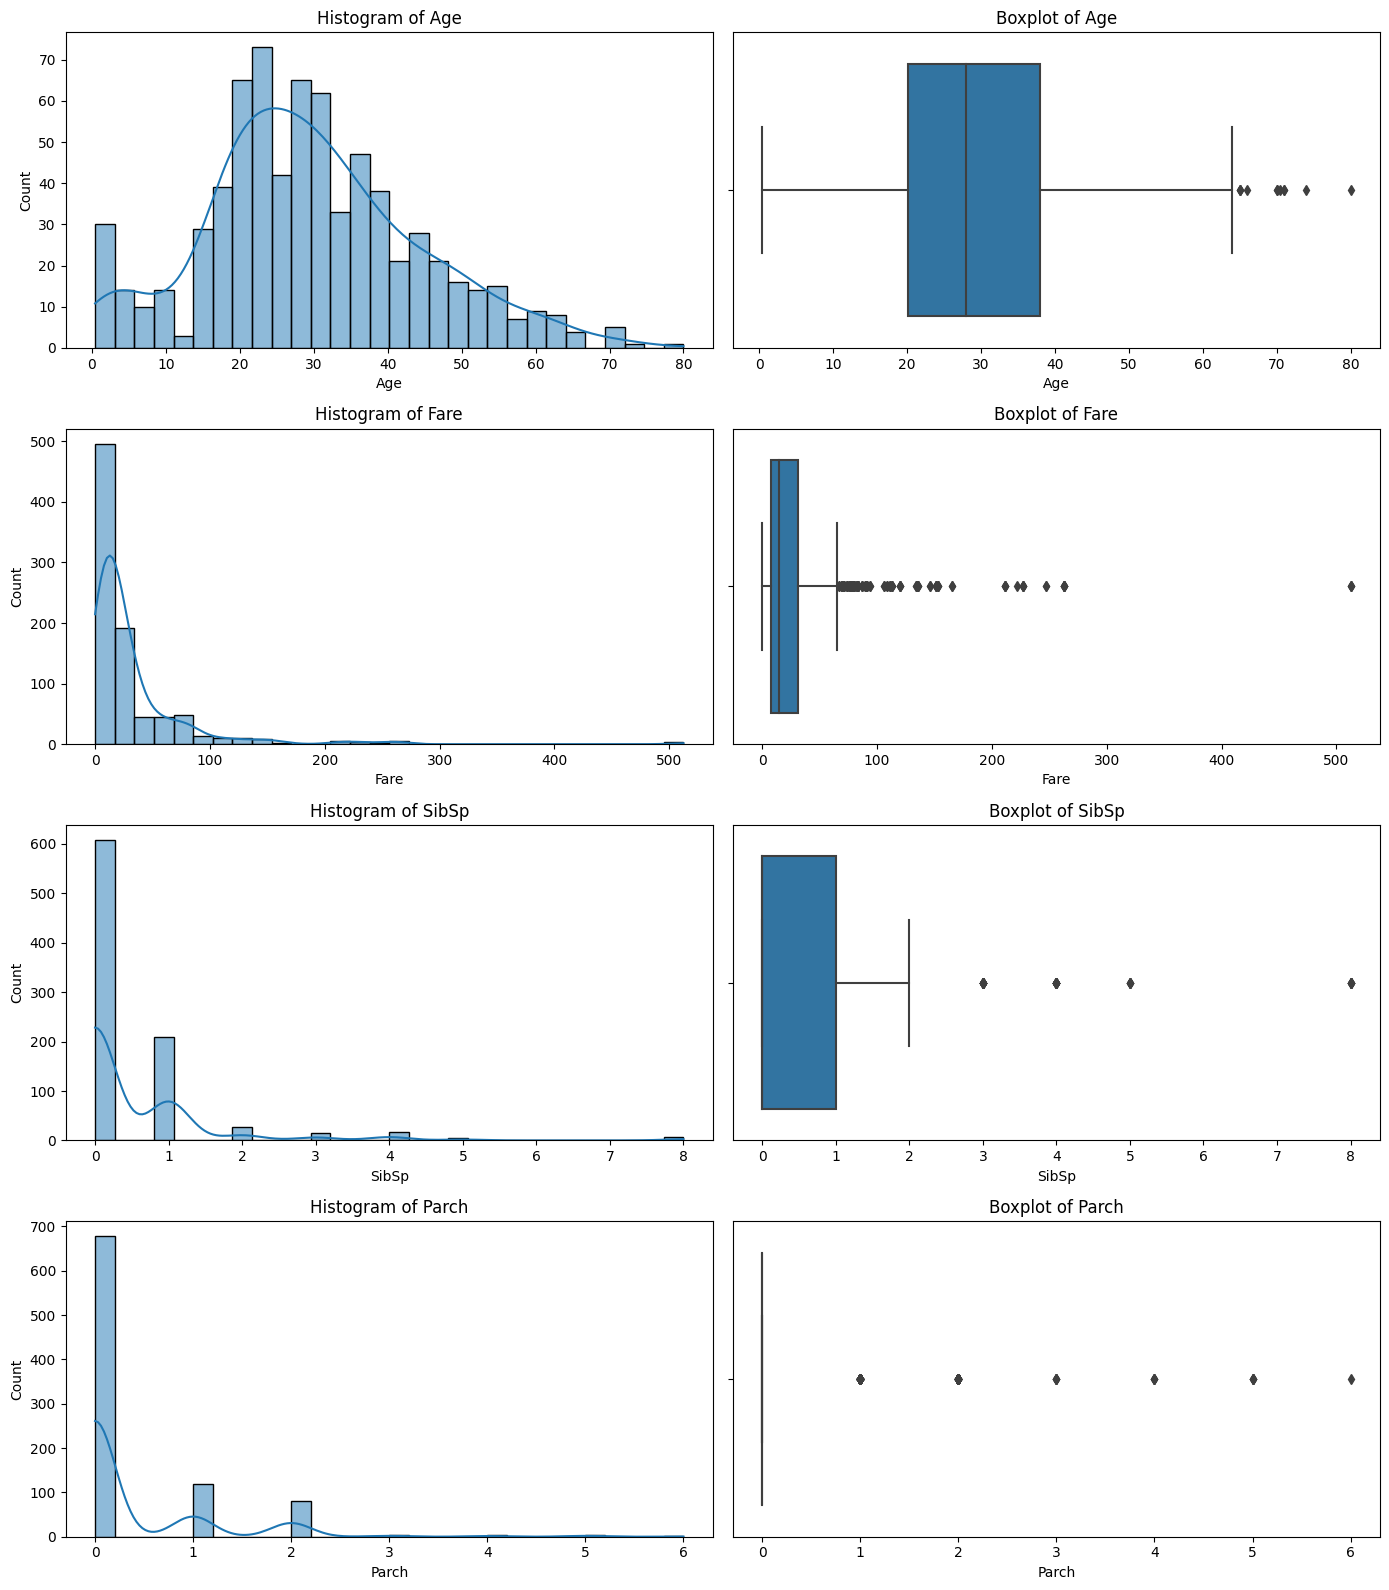

In [14]:
# Create histograms and boxplots
fig, axes = plt.subplots(len(numeric_features), 2, figsize=(14, 16))

for i, feature in enumerate(numeric_features):
    sns.histplot(df[feature].dropna(), ax=axes[i, 0], kde=True, bins=30)
    axes[i, 0].set_title(f'Histogram of {feature}')
    
    sns.boxplot(x=df[feature], ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

Age:

1. Histogram: Bell-shaped, centered around ~30.

2. Boxplot: Some outliers beyond age 60–80.

Fare:

1. Histogram: Strong right skew (many low fares, few high outliers).

2. Boxplot: Clear presence of high-value outliers.

SibSp (Siblings/Spouses):

1. Histogram: Most passengers had 0 or 1.

2. Boxplot: Outliers at values like 5 or 8.

Parch (Parents/Children):

1. Histogram: Majority had 0; a few had more than 3.

2. Boxplot: Skewed right with several outliers.

**PairPlot for feature relationship**

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

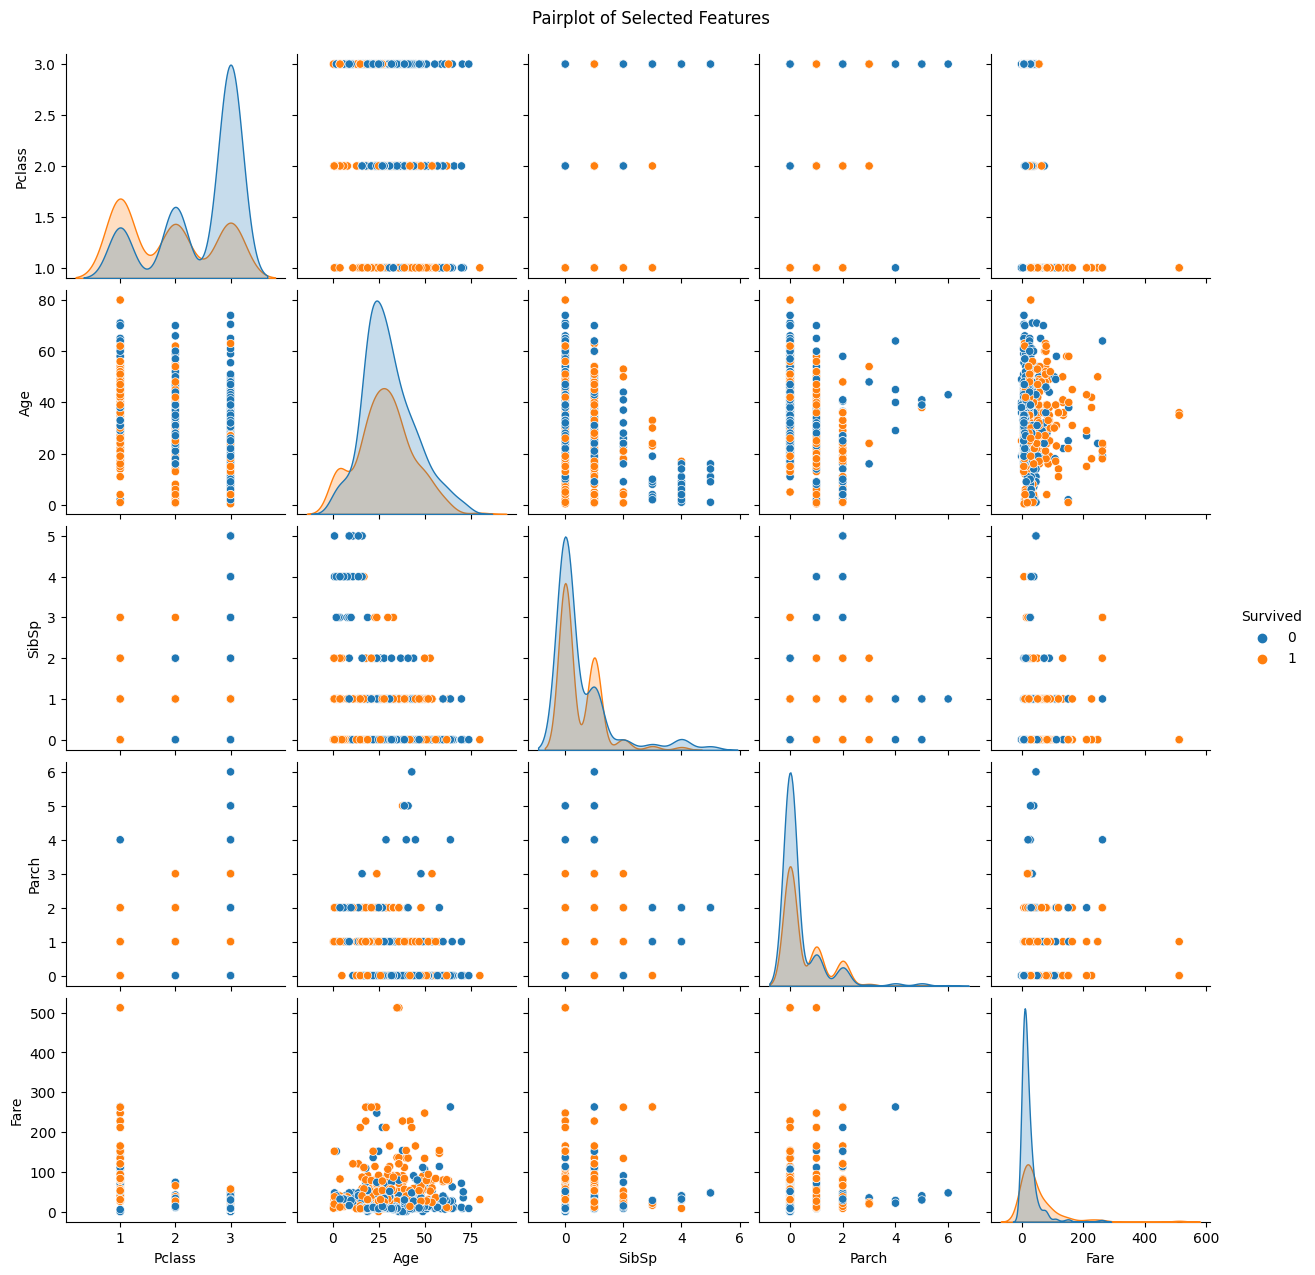

In [15]:
selected_features = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
sns.pairplot(df[selected_features].dropna(), hue="Survived", diag_kind="kde")
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()


**Corelation Matrix**

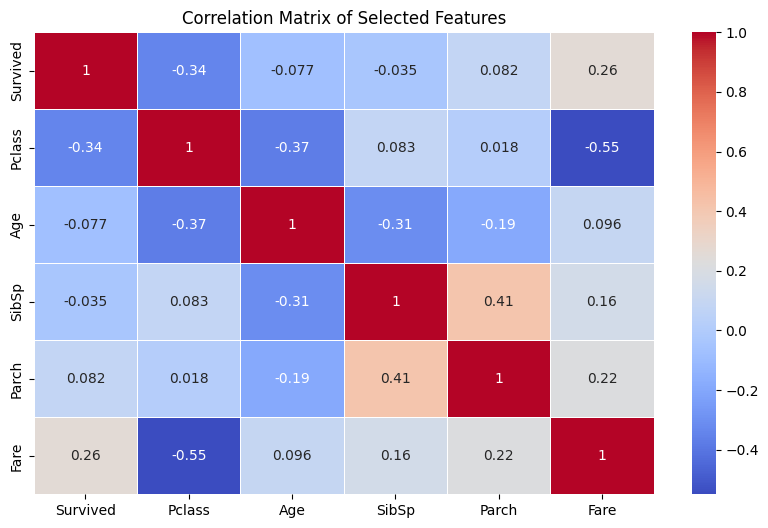

In [16]:
plt.figure(figsize=(10, 6))
corr_matrix = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Selected Features')
plt.show()


 **Pattern & Trend Identification**

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

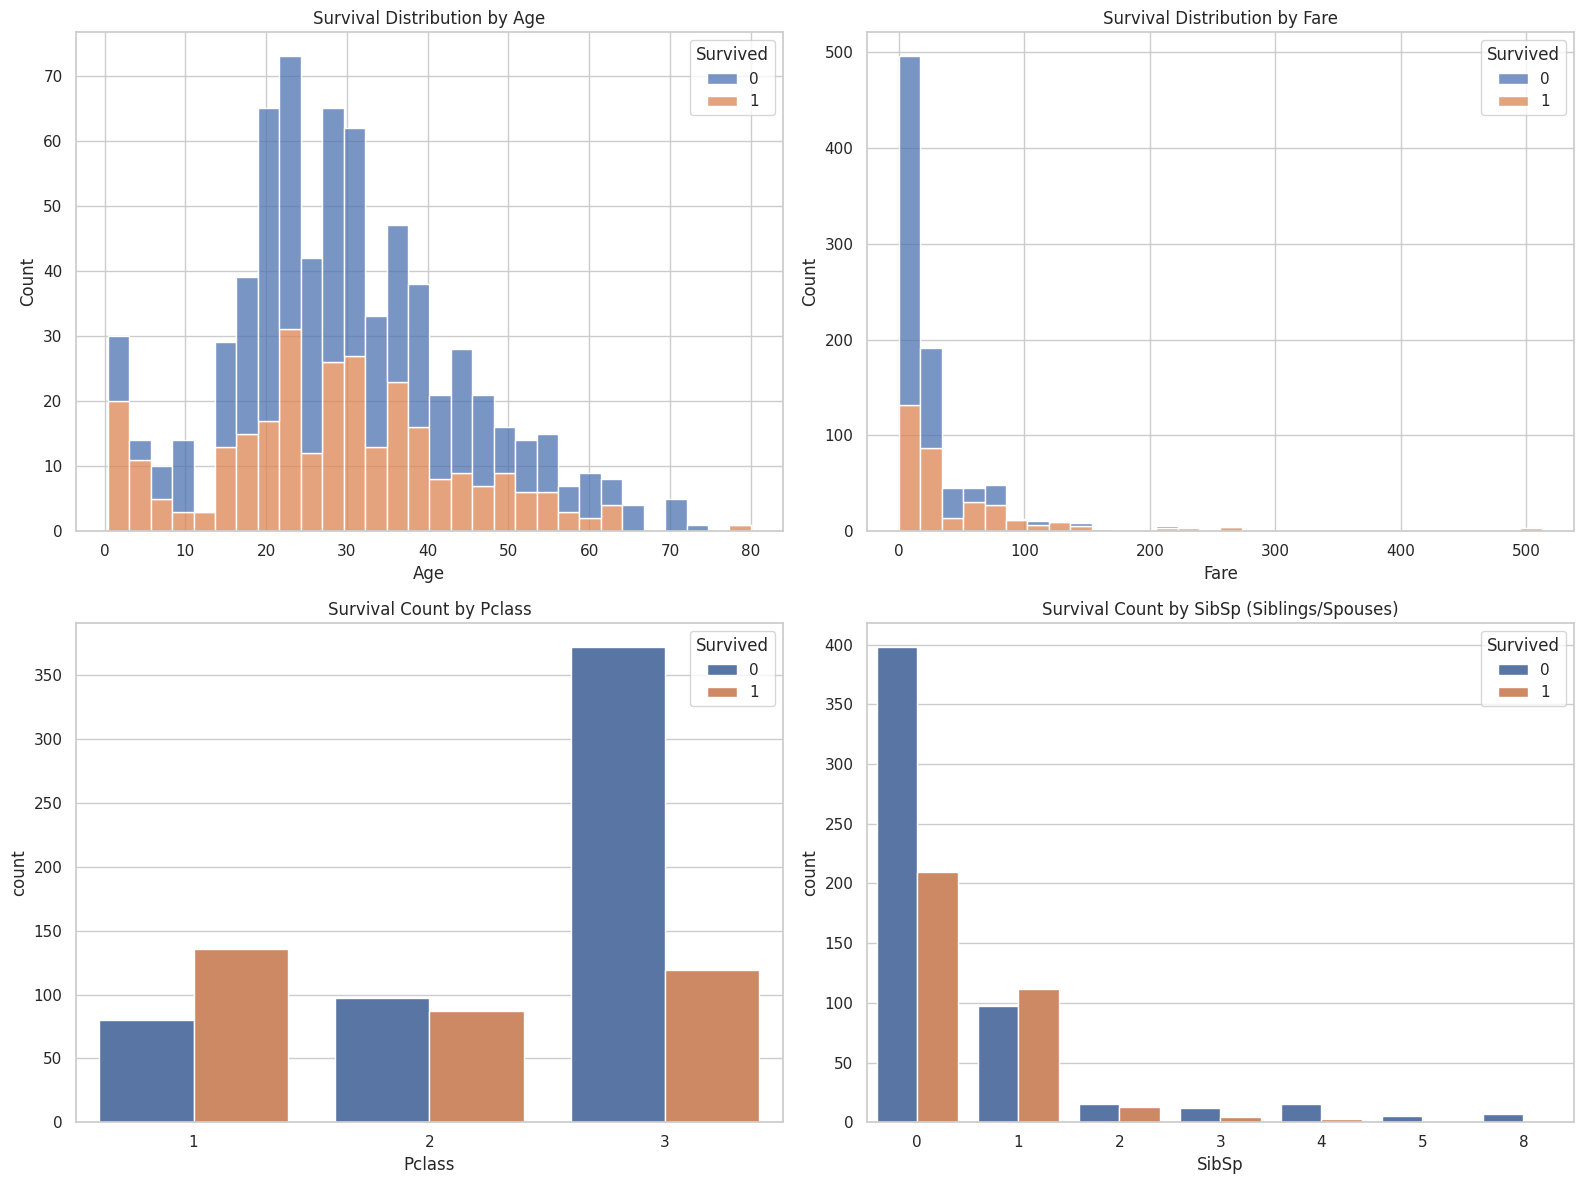

In [20]:
# Set the visual style
sns.set(style="whitegrid")

# Create figure
plt.figure(figsize=(16, 12))

# 1. Survival vs Age
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', bins=30)
plt.title('Survival Distribution by Age')

# 2. Survival vs Fare
plt.subplot(2, 2, 2)
sns.histplot(data=df, x='Fare', hue='Survived', multiple='stack', bins=30)
plt.title('Survival Distribution by Fare')

# 3. Survival vs Pclass
plt.subplot(2, 2, 3)
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Survival Count by Pclass')

# 4. Survival vs SibSp
plt.subplot(2, 2, 4)
sns.countplot(data=df, x='SibSp', hue='Survived')
plt.title('Survival Count by SibSp (Siblings/Spouses)')

plt.tight_layout()
plt.show()


**Basic Feature-Level Inferences from Visuals**

🔹 1. Sex
. Female passengers had a much higher survival rate than males.

. This strongly supports the “women and children first” evacuation protocol.

Inference: Being female significantly increased the likelihood of survival.

🔹 2. Passenger Class (Pclass)
. 1st class passengers had the highest survival rate.

. 3rd class passengers had the lowest survival rate.

Inference: Higher class → better access to lifeboats and cabins closer to the deck → higher survival.

🔹 3. Age
. Children (Age < 15) were more likely to survive than adults.

. Survival rate decreases with age after ~15–20 years.

Inference: Younger passengers, especially children, were more likely to be saved.

🔹4. Fare
. Passengers who paid higher fares had better survival rates.

. Suggests higher-class tickets (associated with wealth/status) led to better rescue chances.

Inference: Fare correlates with socio-economic advantage, which improved survival odds.

🔹 5. SibSp (Siblings/Spouses) and Parch (Parents/Children)
. Passengers with 1–2 family members had higher survival chances.

. Those traveling alone or with large families had lower survival.

Inference: Moderate family presence may have aided coordination and survival, while large groups struggled to escape together.

🔹 6. Embarked
. Passengers who embarked from Cherbourg (C) had higher survival rates.

. Possibly due to many wealthy 1st class passengers boarding from there.

Inference: Embarkation port can indirectly reflect socio-economic status and influence survival.

**Using Of Plotly for Advance Visualization**

In [23]:
import plotly.express as px

# Drop rows with missing values in relevant columns for clean visualizations
clean_df = df[['Age', 'Fare', 'Pclass', 'Sex', 'Survived', 'Embarked']].dropna()

# 1. Age vs Fare colored by Survival
fig1 = px.scatter(clean_df, x='Age', y='Fare', color='Survived',
                  title='Age vs Fare Colored by Survival', 
                  hover_data=['Pclass', 'Sex'], 
                  color_continuous_scale='Viridis')
fig1.show()

# 2. Box plot: Fare distribution by Pclass
fig2 = px.box(clean_df, x='Pclass', y='Fare', color='Survived',
              title='Fare Distribution by Passenger Class and Survival')
fig2.show()

# 3. Bar plot: Survival rate by Embarked port
fig3 = px.histogram(clean_df, x='Embarked', color='Survived', barmode='group',
                    title='Survival Count by Embarkation Port')
fig3.show()

# 4. Sunburst chart to show hierarchical survival breakdown
fig4 = px.sunburst(clean_df, path=['Sex', 'Pclass', 'Survived'],
                   title='Survival Distribution by Sex and Class')
fig4.show()
